# KNN 펭귄 다중 분류
---

In [2]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 읽기
penguins = pd.read_csv('penguins.csv')
penguins.shape

(344, 7)

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# 결측치 제거
df = penguins.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [8]:
# 인코딩
df['species'] = df['species'].map({
    'Adelie': 0,
    'Chinstrap': 1,
    'Gentoo': 2
    
})

df['island'] = df['island'].map({
    'Biscoe': 0,
    'Dream': 1,
    'Torgersen': 2
})

df['sex'] = df['sex'].map({
    'FEMALE': 0,
    'MALE': 1
})

C:\Users\004\AppData\Local\Temp\ipykernel_17536\2372372075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = df['species'].map({
C:\Users\004\AppData\Local\Temp\ipykernel_17536\2372372075.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = df['island'].map({
C:\Users\004\AppData\Local\Temp\ipykernel_17536\2372372075.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [9]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [10]:
X = df.iloc[:, 2:-1]
y = df['sex']

In [11]:
# 데이터 분리하기 위해 사용
from sklearn.model_selection import train_test_split

# 내부적으로 랜덤으로 비율에 맞게 나누어줌
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(266, 4) (67, 4)
(266,) (67,)


In [12]:
y_train.value_counts()

1    134
0    132
Name: sex, dtype: int64

In [13]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_s = scaler.transform(X_train)
type(X_train), type(X_train_s)

(pandas.core.frame.DataFrame, numpy.ndarray)

In [14]:
X_test_s = scaler.transform(X_test)

In [15]:
y_train = y_train.values
y_test = y_test.values

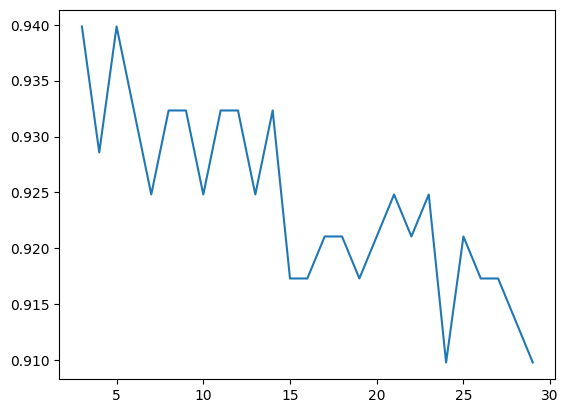

In [61]:
# 학습
from sklearn.neighbors import KNeighborsClassifier

scores = []
for i in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train_s, y_train)
    s = clf.score(X_train_s, y_train)
    scores.append(s)
    
plt.plot(np.arange(3, 30), scores)

### Best

In [62]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train)
s = clf.score(X_train_s, y_train)
print('accuracy: ', s)

accuracy:  0.9398496240601504


In [63]:
# 납품 전 최종 테스트
y_pred = clf.predict(X_test_s)

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def print_score(y_true, y_pred, average='binary'):
    # 정확도
    acc = accuracy_score(y_true, y_pred)
    # 정밀도
    pre = precision_score(y_true, y_pred, average=average)
    # 재현율
    rec = recall_score(y_true, y_pred, average=average)

    print('accuracy:', acc)
    print('precision:', pre)
    print('recall:', pre)

In [65]:
print_score(y_test, y_pred, average='macro')

accuracy: 0.9104477611940298
precision: 0.9121863799283154
recall: 0.9121863799283154


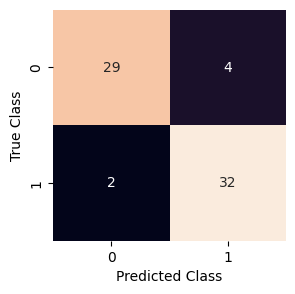

In [66]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(3, 3))
sns.heatmap(cfm, annot=True, cbar=False, fmt='d')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

**결론: 피쳐들을 가지고 종이나 성별은 판별하기 쉽지만 사는 섬은 판별하기 어렵다..**